In [4]:
# Importing Pandas and Numpy library and importing csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("ks_data/ks_projects_201801.csv")

In [5]:
# Checking shape of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
# Formatting the ID column as string
df.ID = df.ID.apply(lambda id: str(int(id)))

In [7]:
# Replace missing values with a "No name"
df["name"].fillna("No name", inplace = True) 

In [8]:
# Formatting the date time 'deadline' and 'launched' columns
df.launched = df.launched.apply(np.datetime64)
df.deadline = df.deadline.apply(np.datetime64)

df.launched.head(1), df.deadline.head(1)

(0   2015-08-11 12:12:28
 Name: launched, dtype: datetime64[ns], 0   2015-10-09
 Name: deadline, dtype: datetime64[ns])

In [9]:
# Creating the first column "launched_week_day"
df['launched_week_day'] = df.launched.map(lambda day: day.day_name())
df.launched_week_day.head(7000)

0        Tuesday
1       Saturday
2       Saturday
3       Saturday
4       Saturday
          ...   
6995     Tuesday
6996      Friday
6997    Saturday
6998    Saturday
6999      Monday
Name: launched_week_day, Length: 7000, dtype: object

In [10]:
df_launched_week_day = df["launched_week_day"].value_counts()
df_launched_week_day

Tuesday      77307
Wednesday    67438
Monday       61228
Thursday     60596
Friday       58327
Saturday     32717
Sunday       21048
Name: launched_week_day, dtype: int64

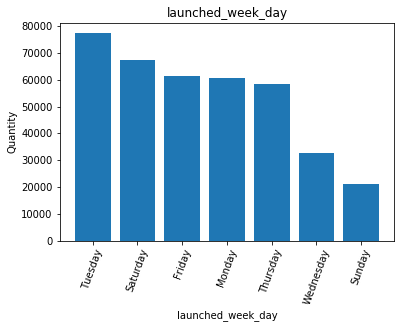

In [11]:
#bar graph
plt.bar(df["launched_week_day"].unique(),df["launched_week_day"].value_counts())

#xticks 
plt.xticks(rotation=70) 

#x-axis labels 
plt.xlabel('launched_week_day') 

#y-axis labels 
plt.ylabel('Quantity') 

#plot title 
plt.title('launched_week_day') 

#save plot 
plt.savefig('C:\\Users\\daszm\\jupiter\\ks_projects_2018\\ks_diagrams\\matplotlib_plotting_5.png',dpi=300,bbox_inches='tight') 

#display 
plt.show();

In [12]:
# creating the second column "duration"
df["duration"] = df.deadline - df.launched
df.duration.head(10)

0   58 days 11:47:32
1   59 days 19:16:03
2   44 days 23:39:10
3   29 days 20:35:49
4   55 days 15:24:57
5   34 days 10:21:33
6   19 days 05:29:16
7   44 days 03:54:48
8   34 days 05:45:17
9   29 days 02:04:12
Name: duration, dtype: timedelta64[ns]

In [16]:
# Calculating the "absolute value" of "duration" column and converting the "time" to "days"
df.duration = df.duration.abs().dt.days
df.duration.head(10)

0    58
1    59
2    44
3    29
4    55
5    34
6    19
7    44
8    34
9    29
Name: duration, dtype: int64

In [17]:
df_duration = df["duration"].value_counts()
df_duration

29       169171
59        33623
44        17749
30        13261
34        10099
          ...  
14732         1
14760         1
16738         1
14866         1
14834         1
Name: duration, Length: 99, dtype: int64

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 17 columns):
ID                   378661 non-null object
name                 378661 non-null object
category             378661 non-null object
main_category        378661 non-null object
currency             378661 non-null object
deadline             378661 non-null datetime64[ns]
goal                 378661 non-null float64
launched             378661 non-null datetime64[ns]
pledged              378661 non-null float64
state                378661 non-null object
backers              378661 non-null int64
country              378661 non-null object
usd pledged          374864 non-null float64
usd_pledged_real     378661 non-null float64
usd_goal_real        378661 non-null float64
launched_week_day    378661 non-null object
duration             378661 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(2), object(8)
memory usage: 49.1+ MB
